# EDA and Topic modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas.core.dtypes.cast")


In [2]:
roberta_df = pd.read_csv("review_data/en_de_rwsl.csv")
roberta_df = roberta_df.reset_index(drop = True)

In [3]:
roberta_df

,index,name,rating,author_title,review_text,review_rating,date,language,negative,neutral,positive
0,0,Lost Weekend,4.4,Lucas Gahn,"['Café', 'Super', 'Stilvoll', 'einrichten', '-...",5.0,2023-10-09,de,0.072393,0.133103,0.794504
1,1,Lost Weekend,4.4,Susanne Kosch,"['Halblang', '--', 'Motto', '--', 'Hang', 'Loo...",5.0,2023-10-09,de,0.402432,0.429644,0.167923
2,2,Lost Weekend,4.4,sahar sajedi,"['Wässriger', '--', 'veganer', '--']",2.0,2023-10-04,de,0.806672,0.145075,0.048253
3,3,Lost Weekend,4.4,Canberk,"['great', 'study', 'day', 'drink', 'good', '.'...",5.0,2023-09-28,en,0.022043,0.116644,0.861314
4,5,Lost Weekend,4.4,Ella H,"['überfüllt', 'Studentencafe', '--', 'nettes',...",4.0,2023-09-20,de,0.932403,0.051656,0.015941
...,...,...,...,...,...,...,...,...,...,...,...
2891,3149,Dinatale Cafe,4.7,TobiasMud,"['stammlokal', 'gut', 'Wochenende', '--', 'zud...",5.0,2019-07-06,de,0.039865,0.117227,0.842907
2892,3150,Dinatale Cafe,4.7,Susanne S.,"['good', 'town', '.', 'good', 'staff', 'town',...",5.0,2019-06-26,en,0.065482,0.114400,0.820118
2893,3151,Dinatale Cafe,4.7,Vincent Vogt,"['dolce', 'vita', 'well', '.', 'stop', '..', '!']",5.0,2019-06-16,en,0.025826,0.111811,0.862363
2894,3153,Dinatale Cafe,4.7,Andy Baumann,"['einfach', 'herrlich', '--', '--', 'italienis...",5.0,2019-06-10,de,0.062306,0.088234,0.849460


In [4]:
roberta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2896 non-null   int64  
 1   name           2896 non-null   object 
 2   rating         2896 non-null   float64
 3   author_title   2896 non-null   object 
 4   review_text    2896 non-null   object 
 5   review_rating  2896 non-null   float64
 6   date           2896 non-null   object 
 7   language       2896 non-null   object 
 8   negative       2896 non-null   float64
 9   neutral        2896 non-null   float64
 10  positive       2896 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 249.0+ KB


In [5]:
roberta_df['date'] = pd.to_datetime(roberta_df['date'])

In [6]:
roberta_df

,index,name,rating,author_title,review_text,review_rating,date,language,negative,neutral,positive
0,0,Lost Weekend,4.4,Lucas Gahn,"['Café', 'Super', 'Stilvoll', 'einrichten', '-...",5.0,2023-10-09,de,0.072393,0.133103,0.794504
1,1,Lost Weekend,4.4,Susanne Kosch,"['Halblang', '--', 'Motto', '--', 'Hang', 'Loo...",5.0,2023-10-09,de,0.402432,0.429644,0.167923
2,2,Lost Weekend,4.4,sahar sajedi,"['Wässriger', '--', 'veganer', '--']",2.0,2023-10-04,de,0.806672,0.145075,0.048253
3,3,Lost Weekend,4.4,Canberk,"['great', 'study', 'day', 'drink', 'good', '.'...",5.0,2023-09-28,en,0.022043,0.116644,0.861314
4,5,Lost Weekend,4.4,Ella H,"['überfüllt', 'Studentencafe', '--', 'nettes',...",4.0,2023-09-20,de,0.932403,0.051656,0.015941
...,...,...,...,...,...,...,...,...,...,...,...
2891,3149,Dinatale Cafe,4.7,TobiasMud,"['stammlokal', 'gut', 'Wochenende', '--', 'zud...",5.0,2019-07-06,de,0.039865,0.117227,0.842907
2892,3150,Dinatale Cafe,4.7,Susanne S.,"['good', 'town', '.', 'good', 'staff', 'town',...",5.0,2019-06-26,en,0.065482,0.114400,0.820118
2893,3151,Dinatale Cafe,4.7,Vincent Vogt,"['dolce', 'vita', 'well', '.', 'stop', '..', '!']",5.0,2019-06-16,en,0.025826,0.111811,0.862363
2894,3153,Dinatale Cafe,4.7,Andy Baumann,"['einfach', 'herrlich', '--', '--', 'italienis...",5.0,2019-06-10,de,0.062306,0.088234,0.849460


## Descriptive Statistics
- Distribution of sentiment.
- Calculating the mean, median, mode and standard deviation for each sentiment column and each venue.
- Comparison results and insights.

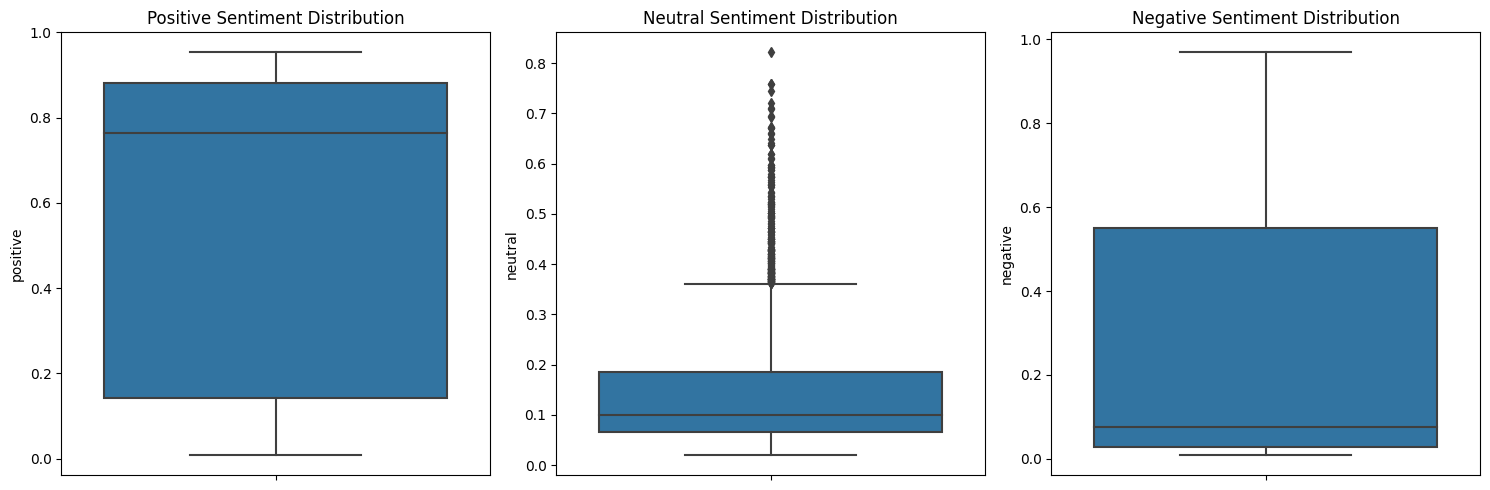

In [7]:
# Boxplot for Positive Sentiment
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=roberta_df['positive'])
plt.title('Positive Sentiment Distribution')

# Boxplot for Neutral Sentiment
plt.subplot(1, 3, 2)
sns.boxplot(y=roberta_df['neutral'])
plt.title('Neutral Sentiment Distribution')

# Boxplot for Negative Sentiment
plt.subplot(1, 3, 3)
sns.boxplot(y=roberta_df['negative'])
plt.title('Negative Sentiment Distribution')

plt.tight_layout()
plt.show()


- The positive sentiments are relatively high, with most scores clustering around 0.6 to 1.0. This suggests that a significant portion of the sentiments analyzed lean positive.

- The neutral sentiments are typically lower, with many scores clustering around 0.1 to 0.3. However, there are several outliers that have much higher neutral sentiment scores.

- The negative sentiments have a broader spread, with scores ranging from around 0.2 to 0.8. This means that negative sentiment scores vary more widely than positive or neutral scores.

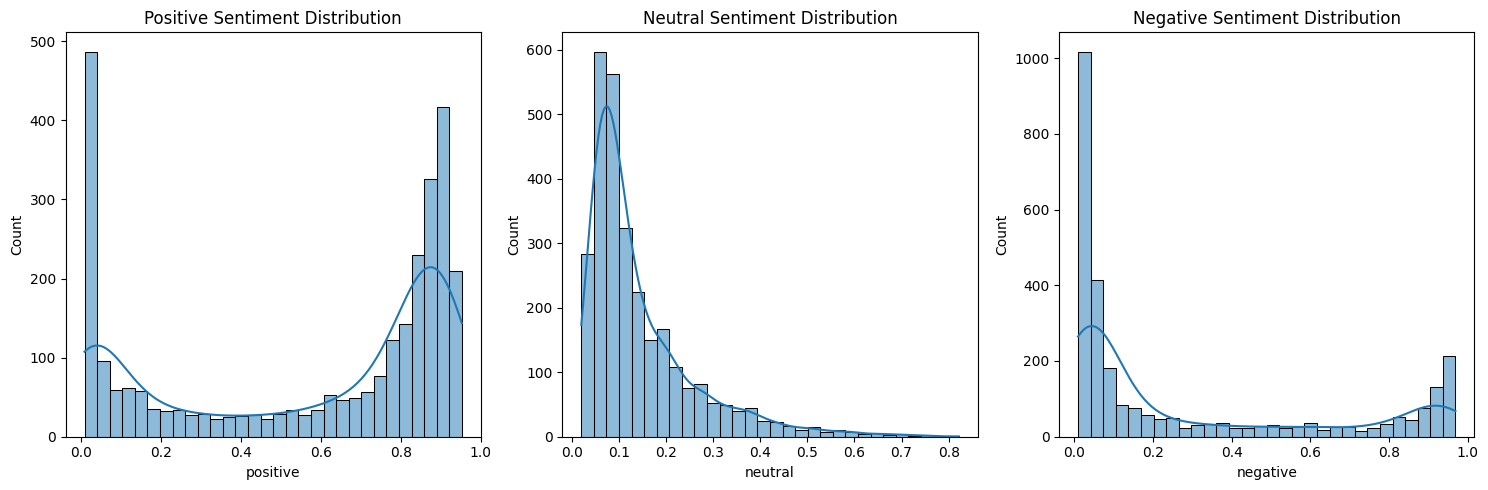

In [8]:
# Histogram for Positive Sentiment
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(roberta_df['positive'], bins=30, kde=True)
plt.title('Positive Sentiment Distribution')

# Histogram for Neutral Sentiment
plt.subplot(1, 3, 2)
sns.histplot(roberta_df['neutral'], bins=30, kde=True)
plt.title('Neutral Sentiment Distribution')

# Histogram for Negative Sentiment
plt.subplot(1, 3, 3)
sns.histplot(roberta_df['negative'], bins=30, kde=True)
plt.title('Negative Sentiment Distribution')

plt.tight_layout()
plt.show()

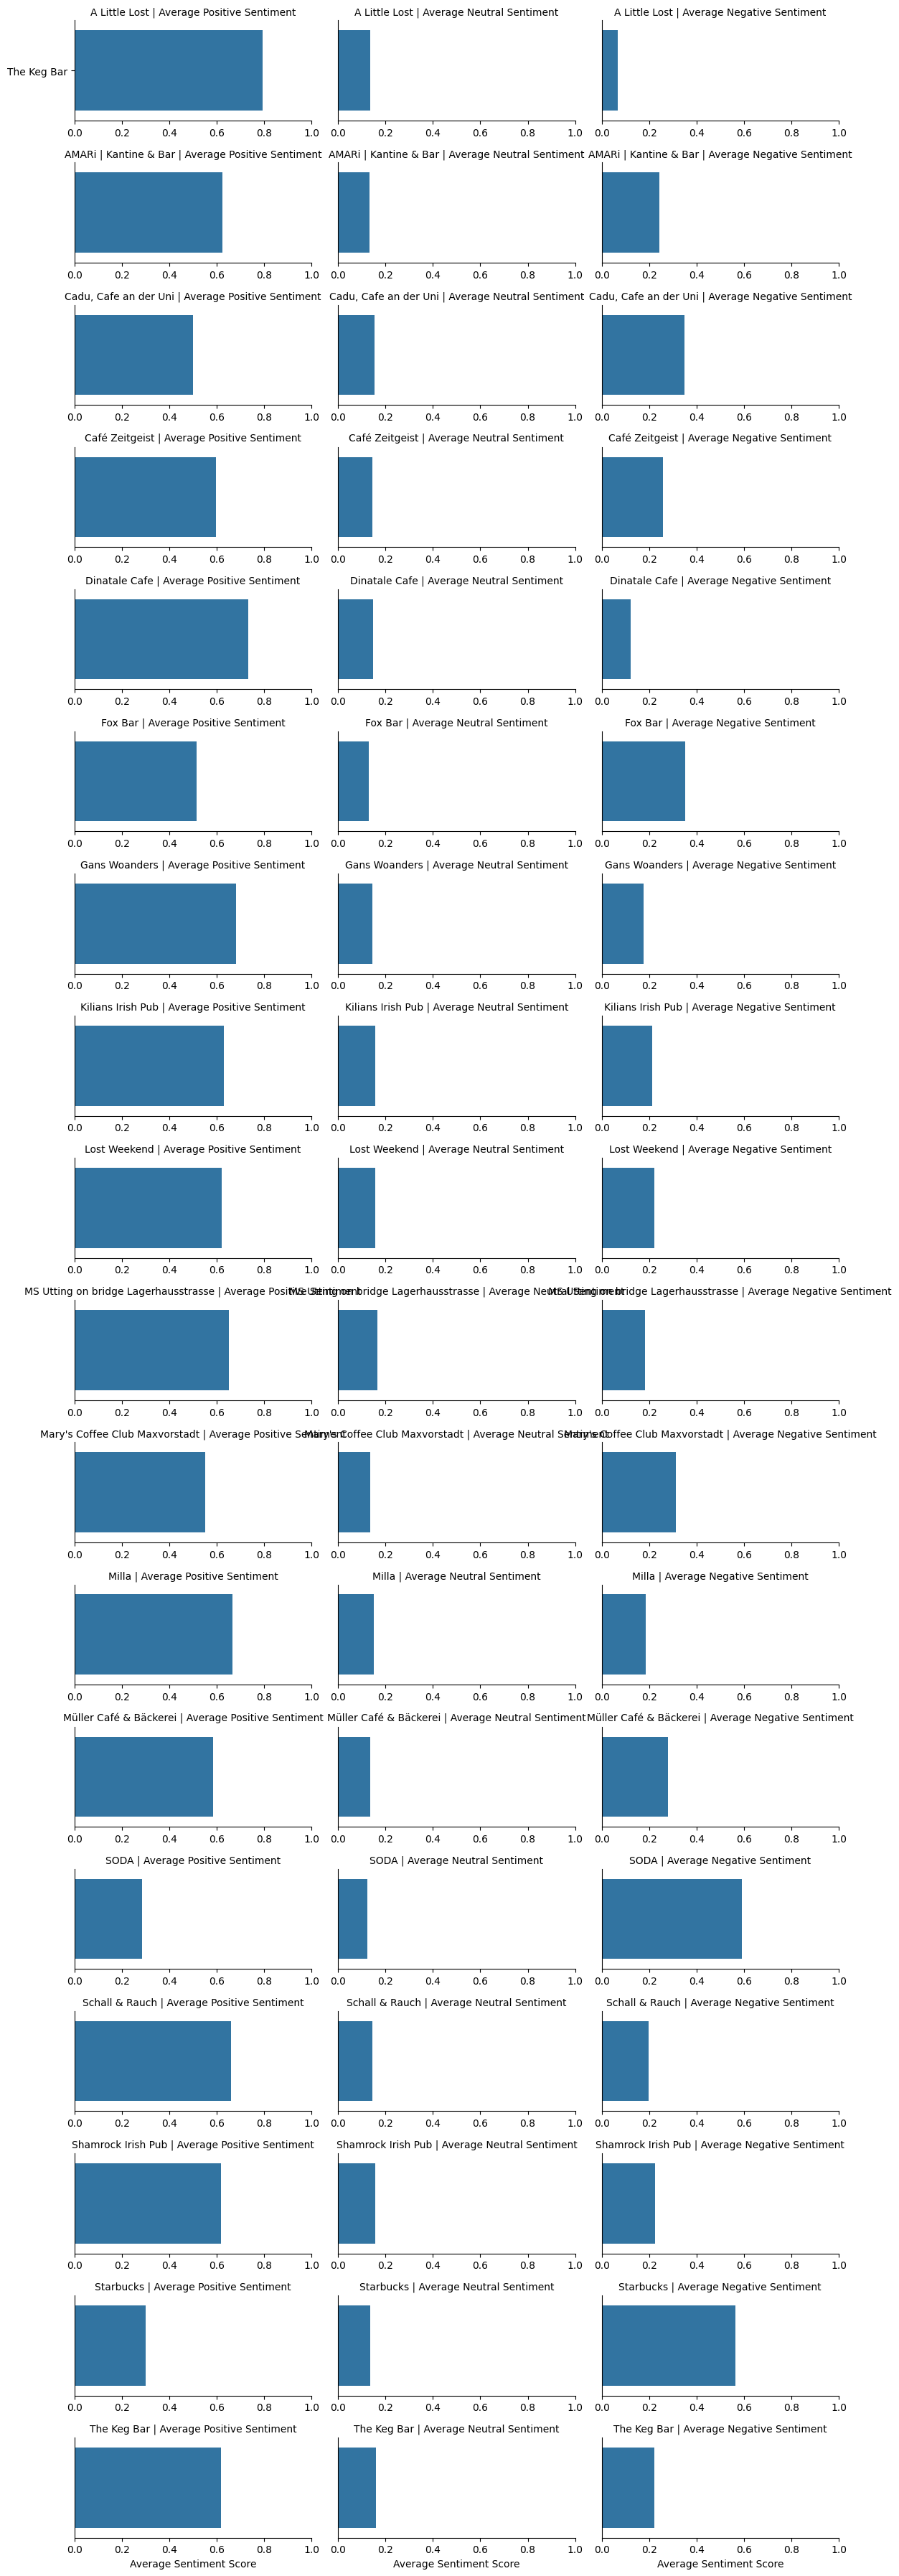

In [9]:
# Grouping and aggregating for the mean.
results = roberta_df.groupby('name').agg({
    'positive': 'mean',
    'neutral': 'mean',
    'negative': 'mean'
}).reset_index()

# Rename the columns for clarity
results.columns = ['Venue', 
                   'Average Positive Sentiment',
                   'Average Neutral Sentiment',
                   'Average Negative Sentiment']

# Convert the results DataFrame to a "long" format suitable for Seaborn
long_format = results.melt(id_vars='Venue', value_vars=[
    'Average Positive Sentiment','Average Neutral Sentiment', 'Average Negative Sentiment'
])

# Create the FacetGrid. Each row is a venue, each column is a sentiment type.
g = sns.FacetGrid(long_format, row="Venue", col="variable", sharex=False, height=2, aspect=2)

# adjust spacing
g.fig.subplots_adjust(hspace=0.5)

# Map barplots onto the grid
g.map_dataframe(sns.barplot, x="value", y="Venue", orient="h")

# Adjust labels and titles
g.set_axis_labels("Average Sentiment Score", "Venue")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xlim=(0, 1))  # Assuming sentiment scores are between 0 and 1

# Remove the y labels for the second and third columns for clarity
g.set(ylabel="")
for ax in g.axes.flat[1:]:
    ax.yaxis.set_visible(False)

g.tight_layout()
plt.show()



- Interesting to see different average sentiments for each venue, Allows to see which venues to compare for LW.

## Time series analysis 

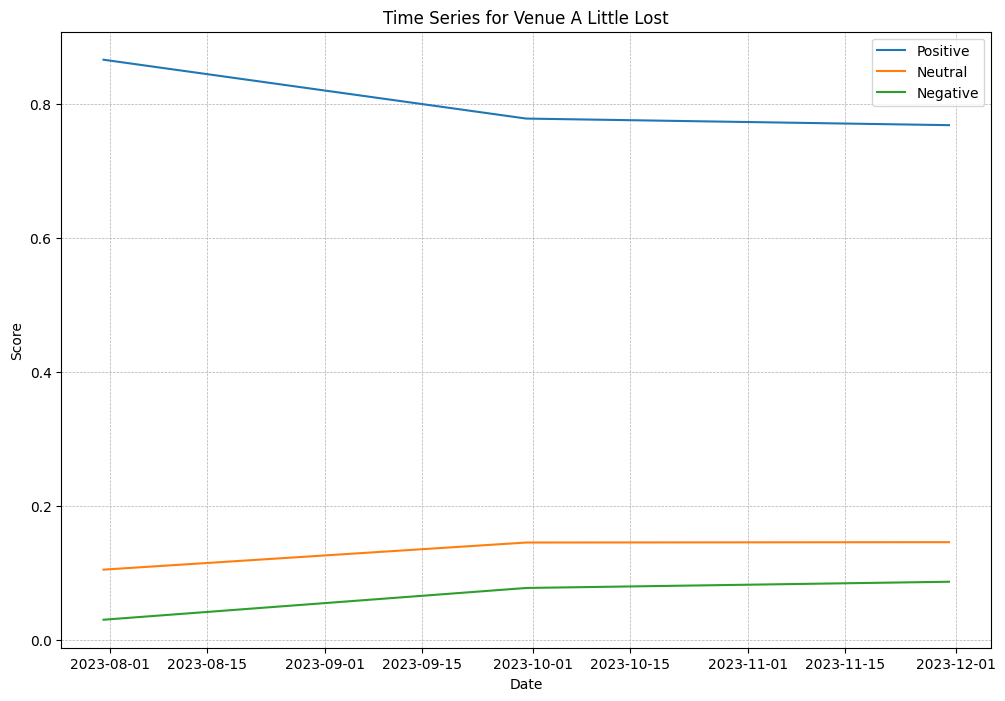

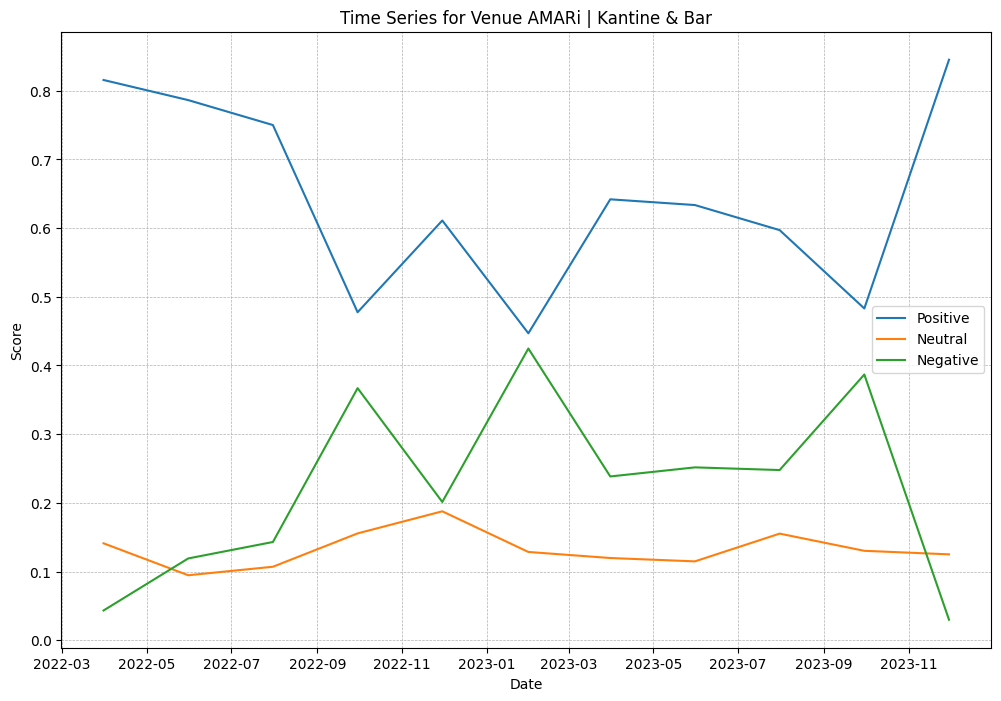

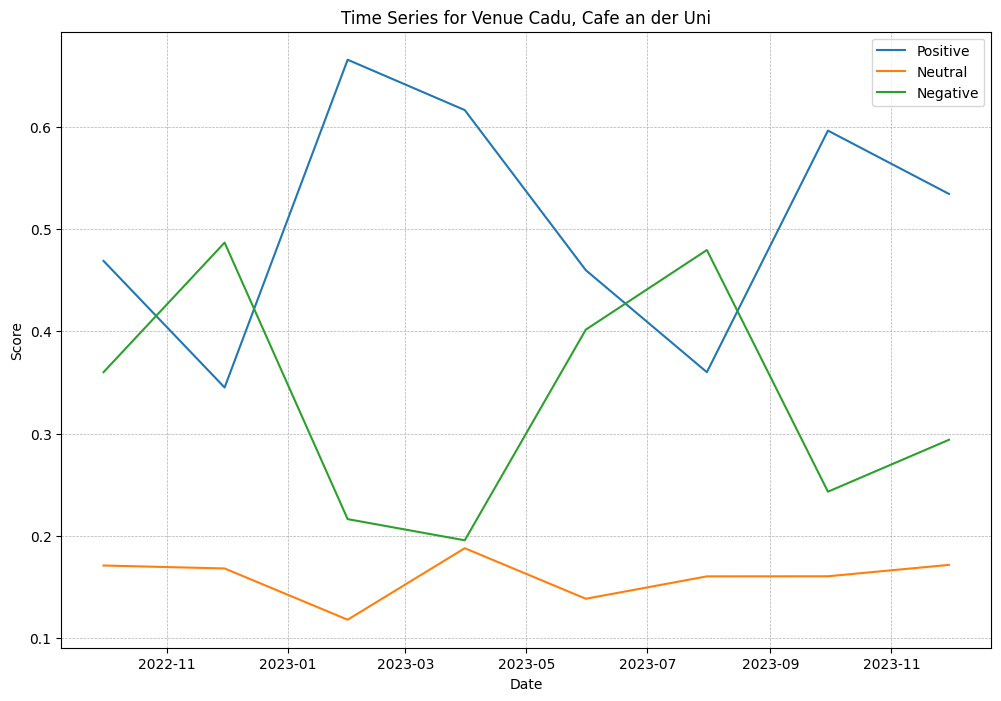

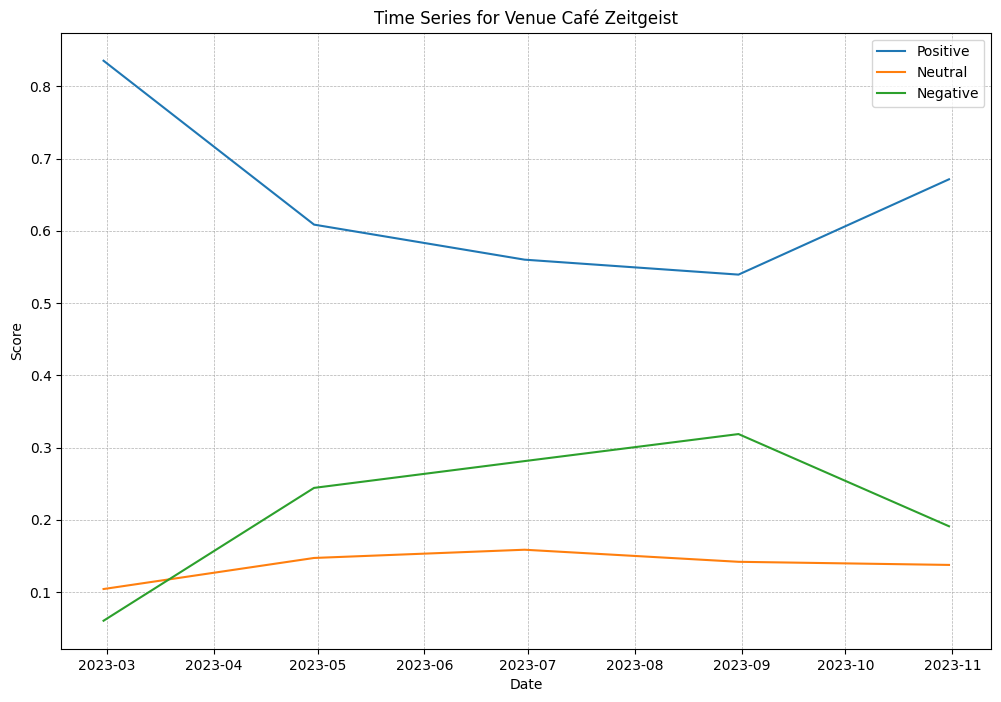

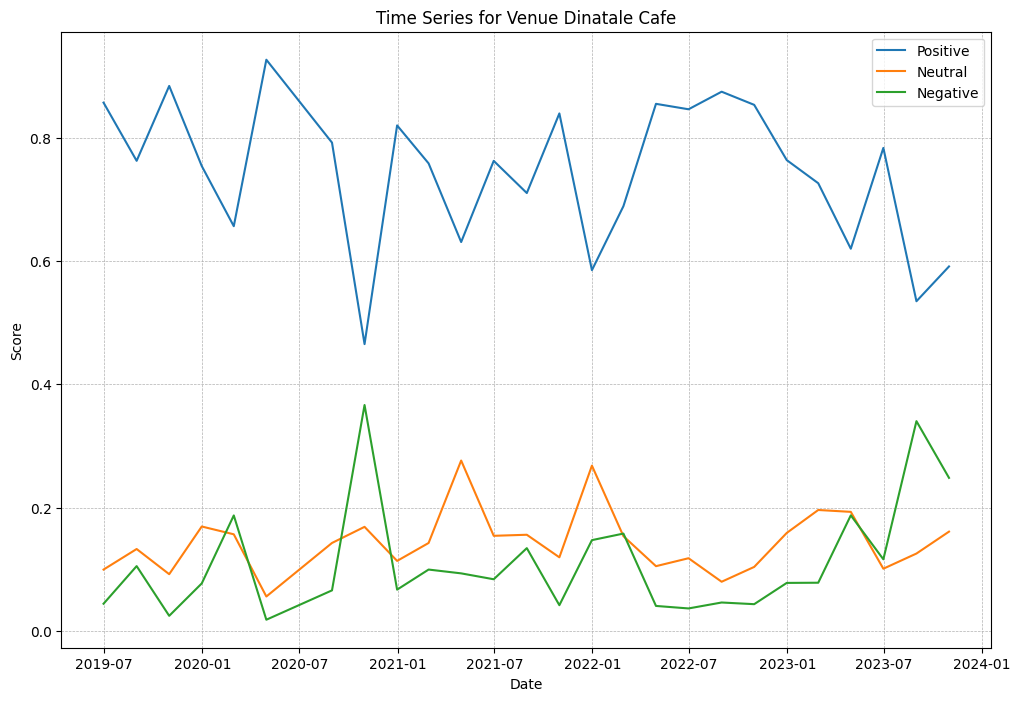

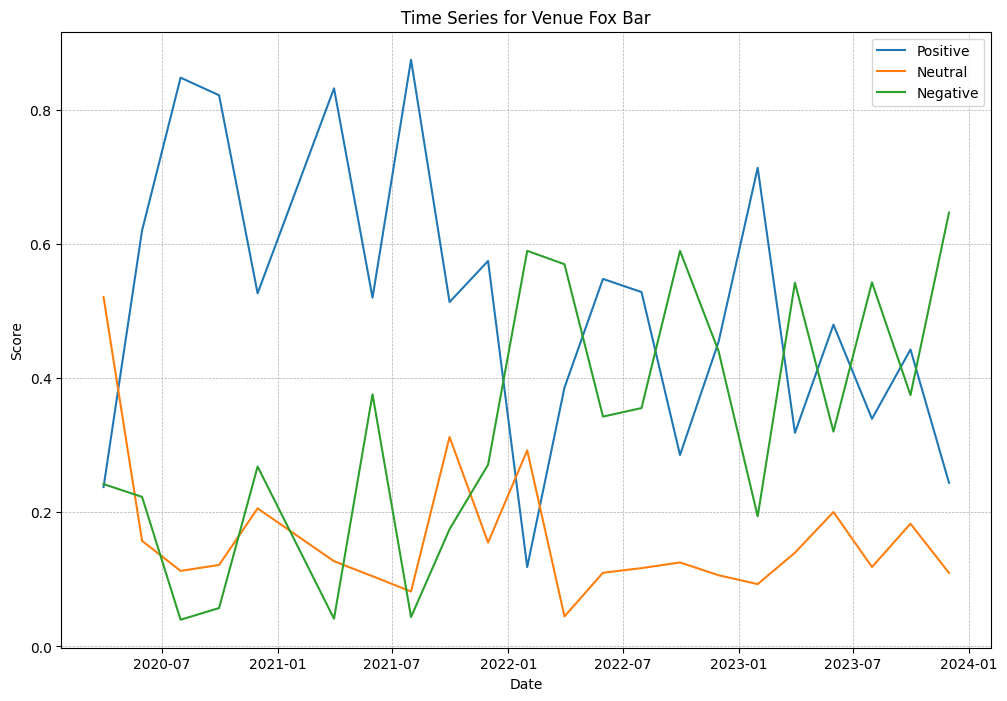

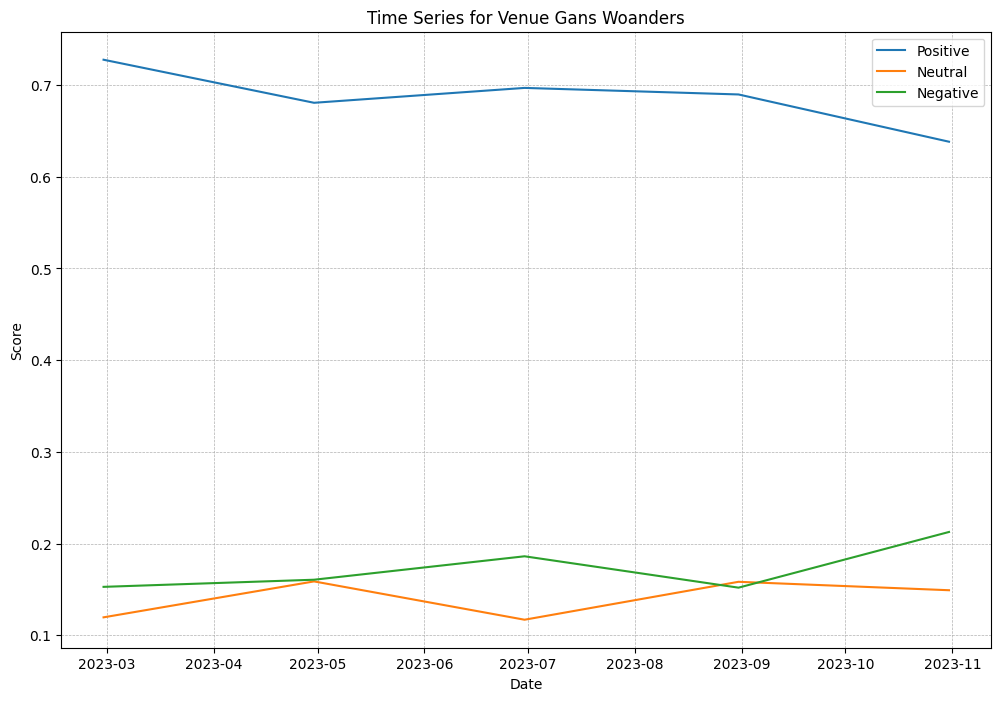

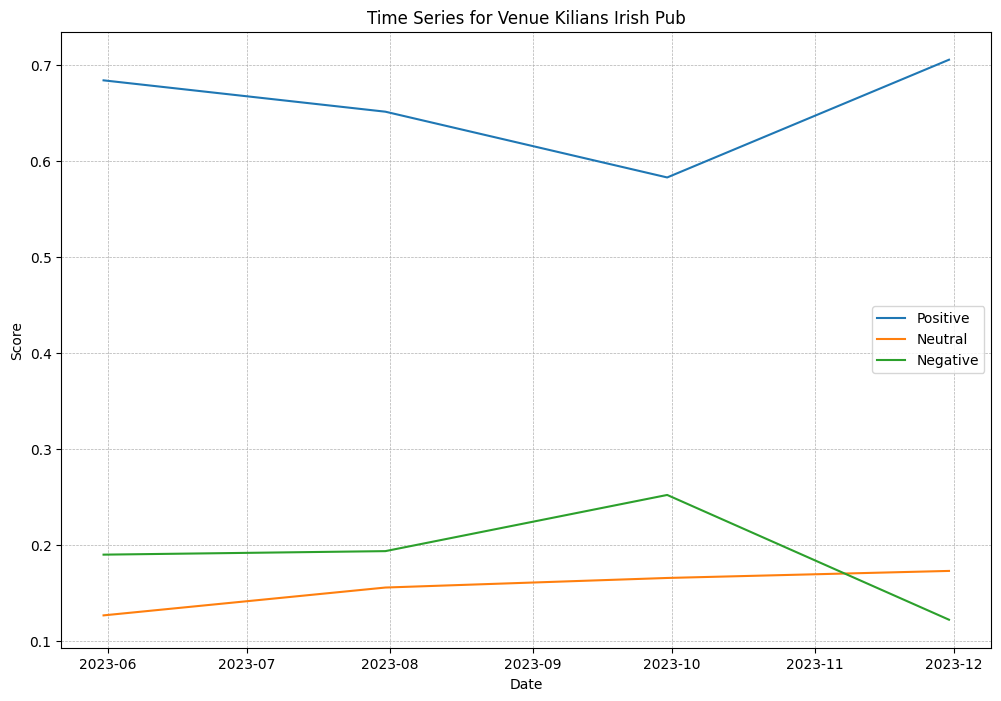

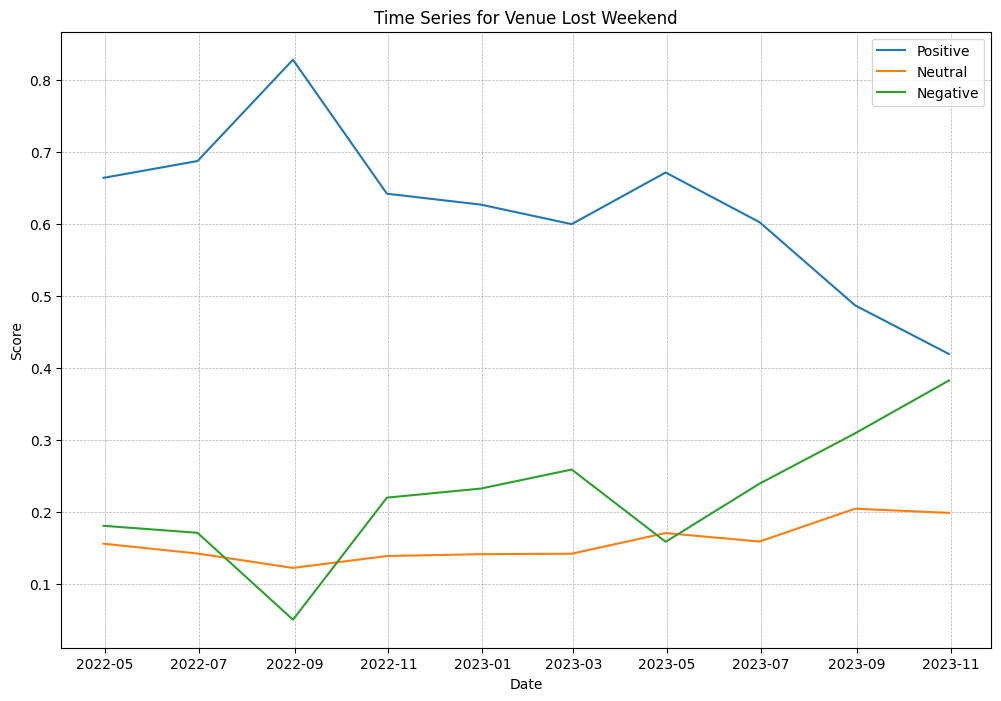

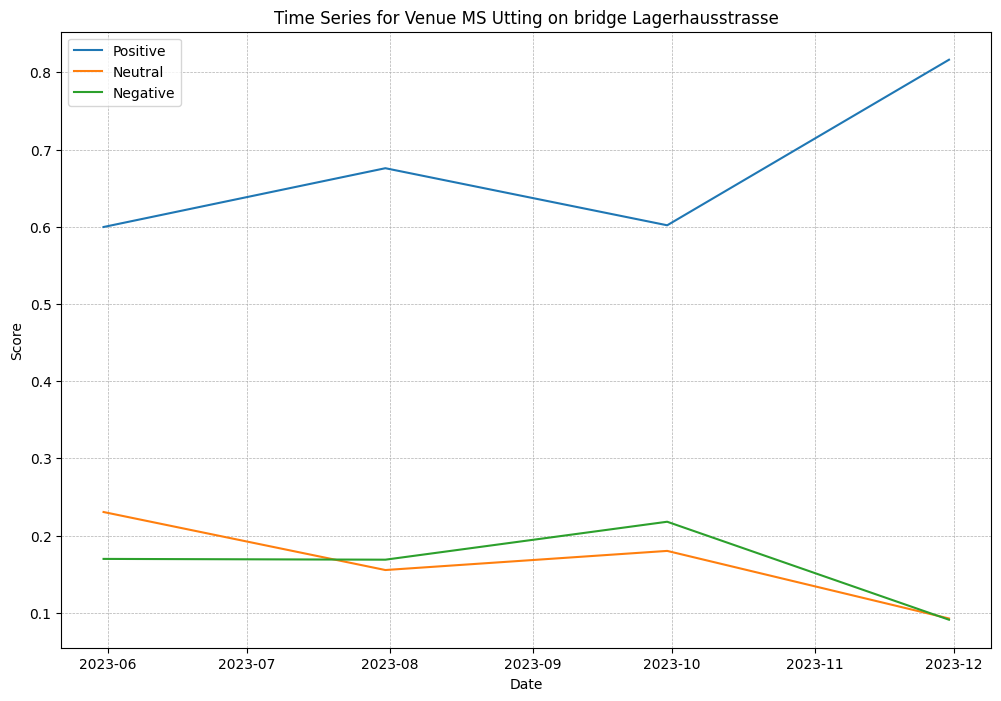

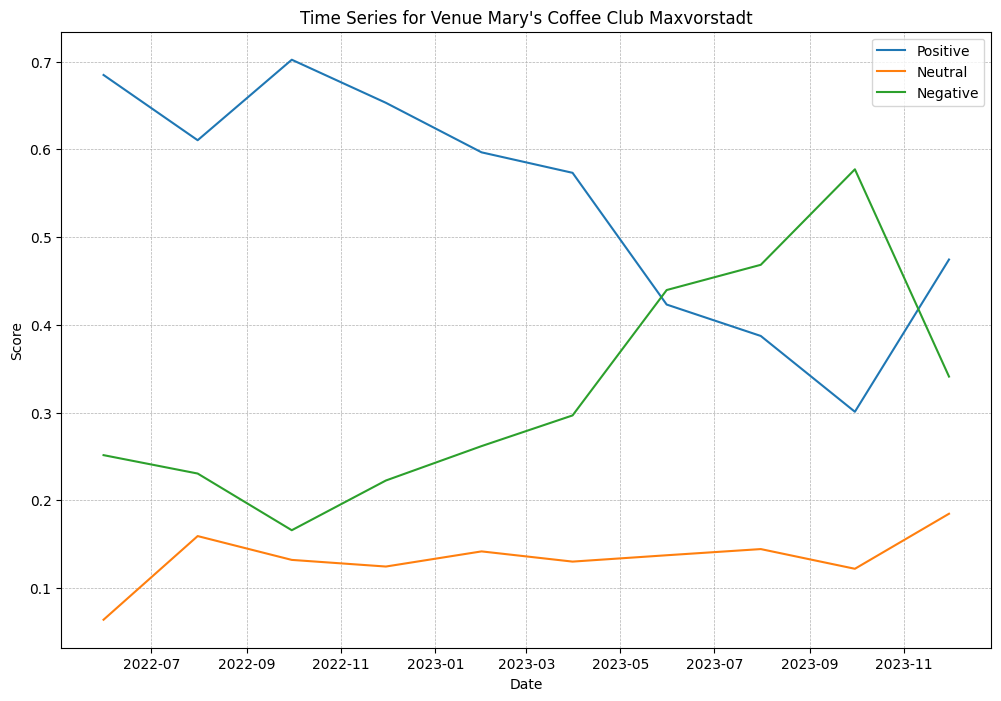

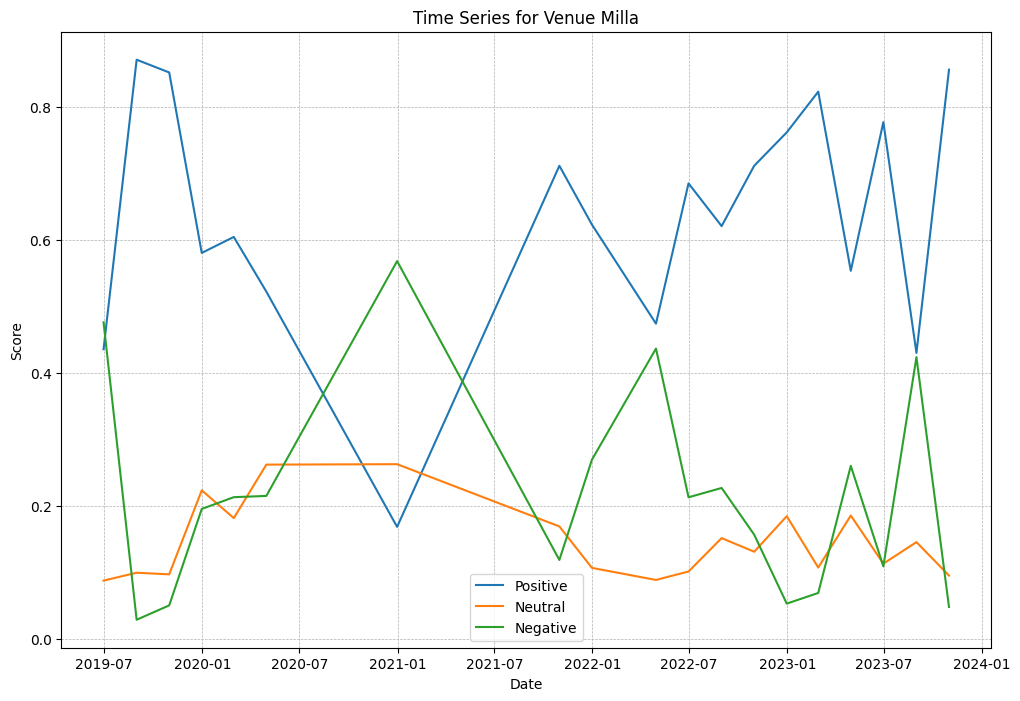

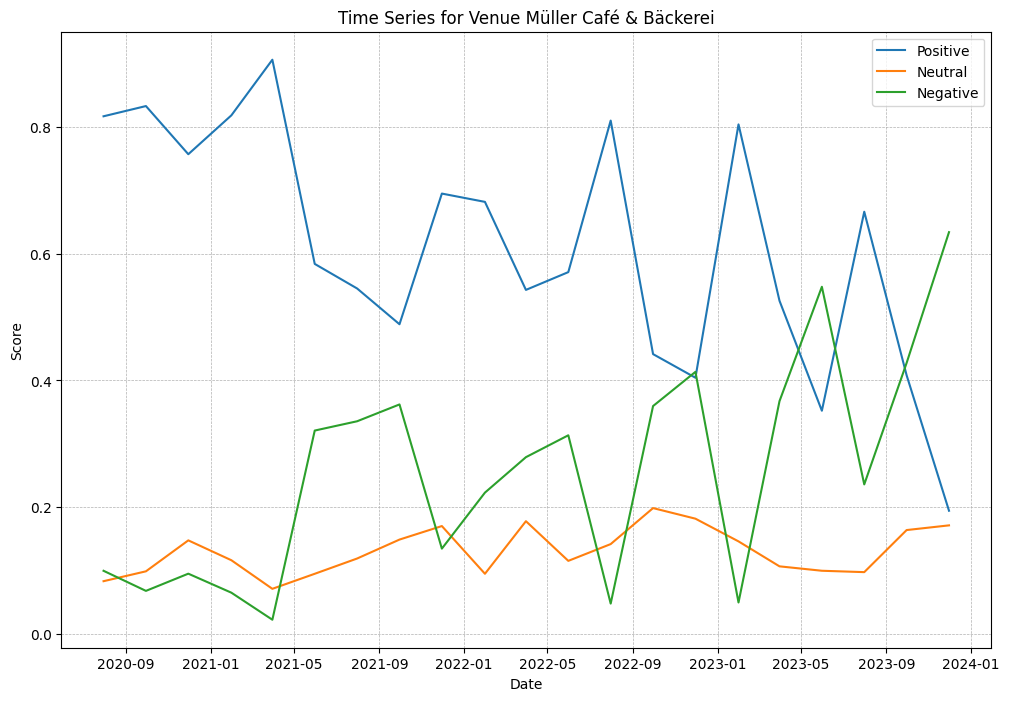

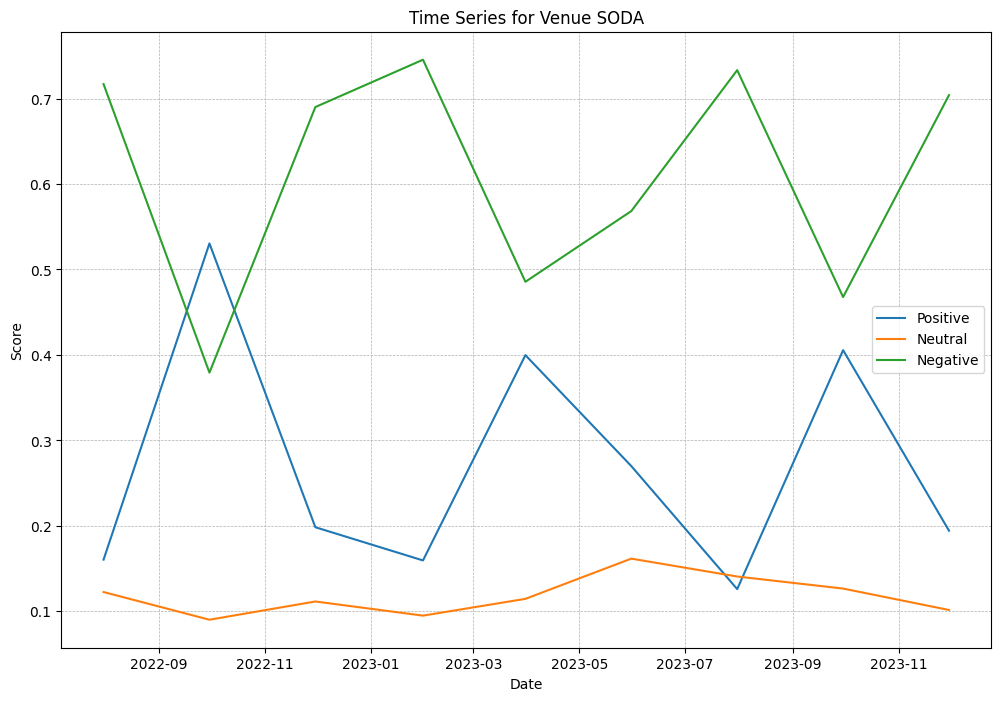

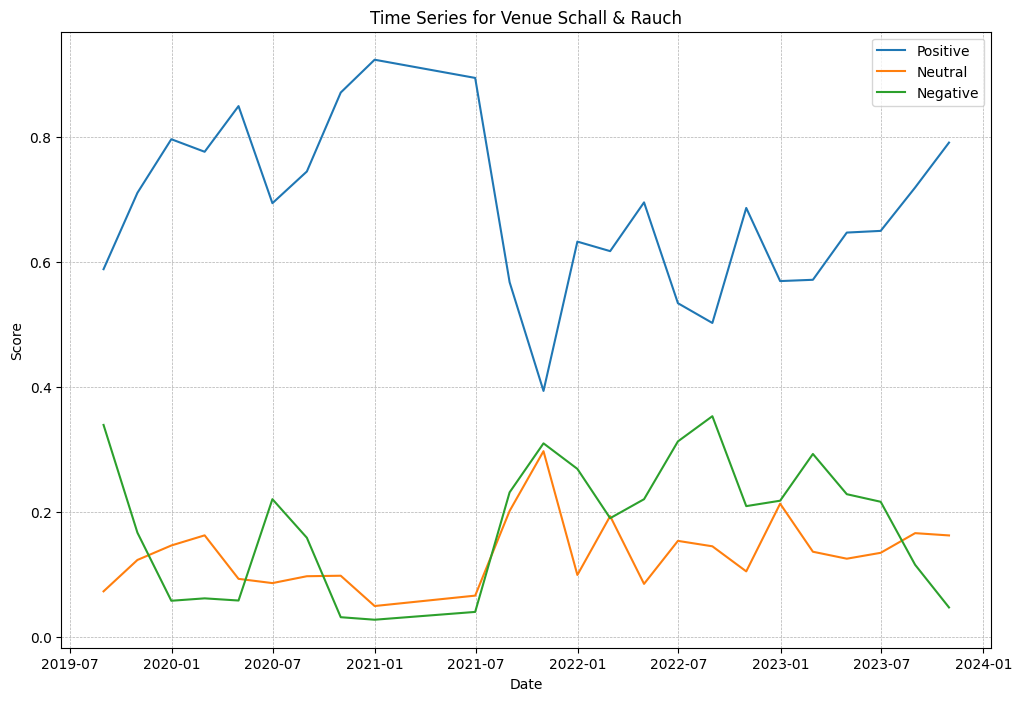

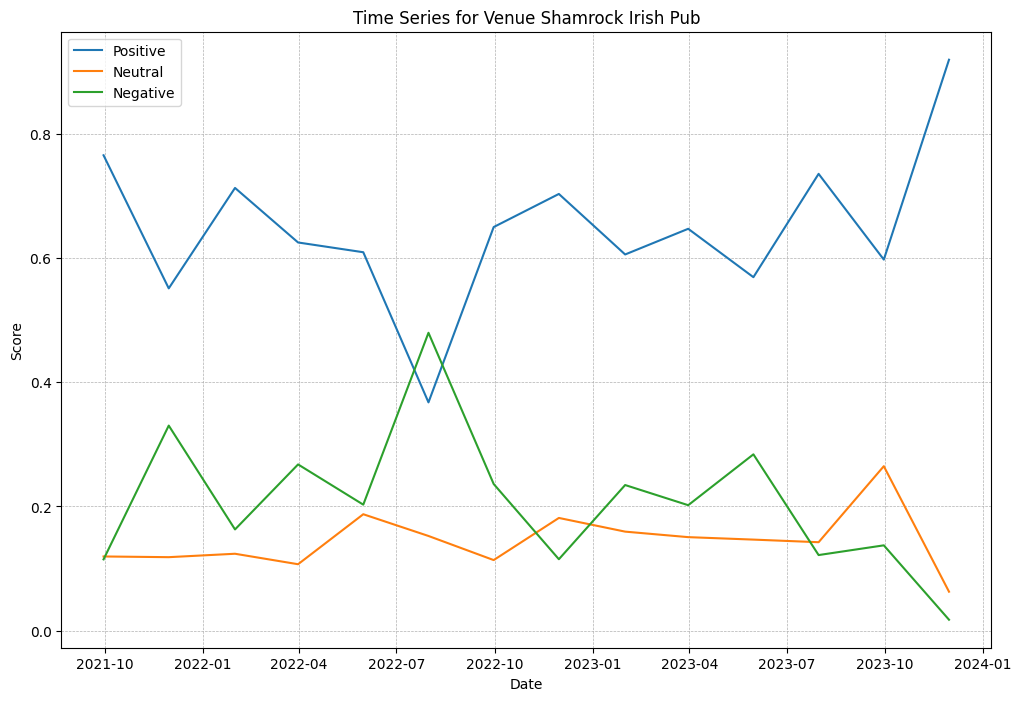

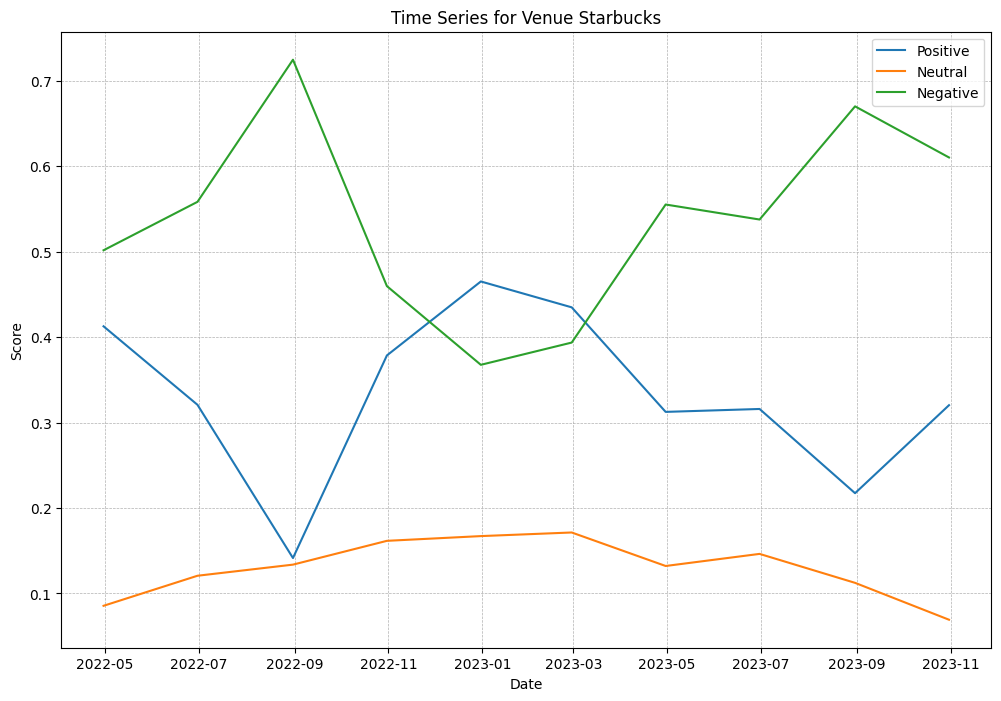

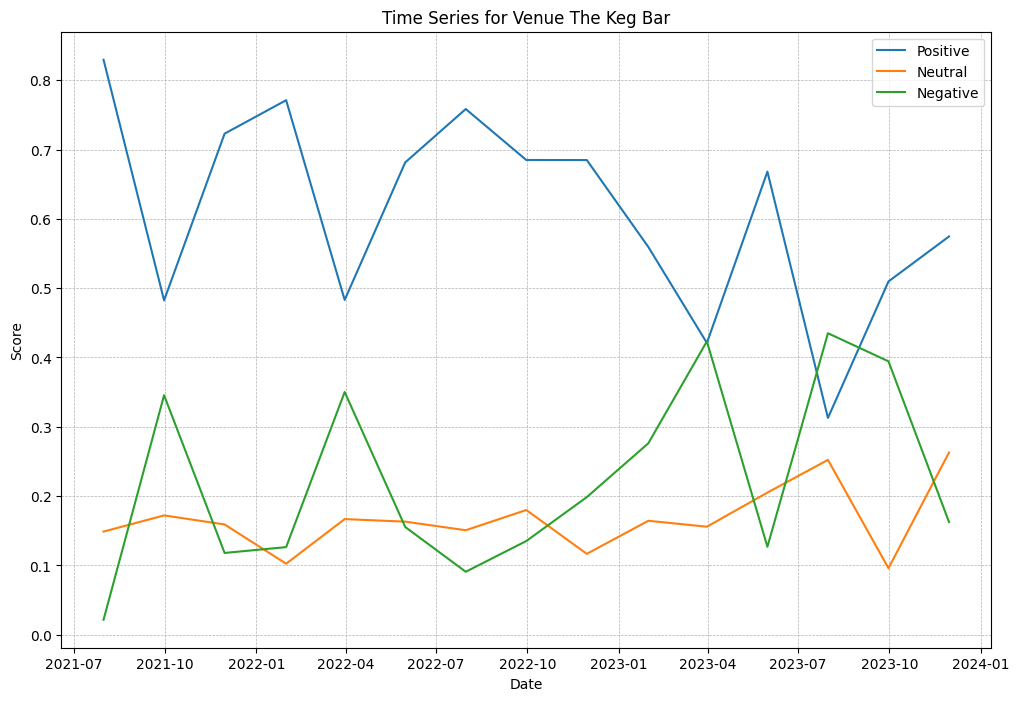

In [10]:
# Resampling to weekly frequency
grouped_weekly = roberta_df.set_index('date').groupby('name').resample('2M').agg({
    'positive' : 'mean',
    'neutral' : 'mean',
    'negative' : 'mean'
})
                           

for venue in grouped_weekly.index.get_level_values('name').unique():
    subset = grouped_weekly.loc[venue]
    
    plt.figure(figsize=(12,8))
    sns.lineplot(data=subset, x=subset.index, y='positive', label='Positive')
    sns.lineplot(data=subset, x=subset.index, y='neutral', label='Neutral')
    sns.lineplot(data=subset, x=subset.index, y='negative', label='Negative')
    
    plt.title(f'Time Series for Venue {venue}')
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.show()
                


### Insights from Time series.

#### Lost weekend.
- Lost Weekend received its most positive feedback around July 2022.
 - While the positive sentiment declined over time, the negative sentiment saw a corresponding increase, especially    from late 2022 onwards.
 - Neutral feedback remained relatively constant throughout the period but indicated a slight increase towards the    end of the series.
 
 #### Competition
 - While there is a rise in negative sentiment Lost Weekend shows good stability compared to other venues
 - a lot of other venues have high fluctuations of sentiment which could show varied public opinion or possible changes and events happening frequently.
 - lots of fluctuating after 2021 which could be due to covid and the increasing difficulty in hiring good trained staff, and possibly also inflation costs affecting standards.
 - main competitors to analyse: Fox bar, Milla, Dinatale, Cadu, Soda, Gans Woanders.

In [11]:
#list of top and bottom performing venues based on average positive and negative sentiment.
grouped = roberta_df.groupby('name'). agg(
    avg_positive = ('positive', 'mean'),
    avg_negative = ('negative', 'mean')
)

top_performing = grouped.sort_values(by = 'avg_positive', ascending = False).head(7)

bottom_performing = grouped.sort_values(by='avg_negative', ascending = False).head(7)

print(top_performing)

print(bottom_performing)

                                      avg_positive  avg_negative
name                                                            
A Little Lost                             0.794062      0.068888
Dinatale Cafe                             0.731662      0.121705
Gans Woanders                             0.681474      0.175342
Milla                                     0.665152      0.184678
Schall & Rauch                            0.659609      0.197152
MS Utting on bridge Lagerhausstrasse      0.652162      0.181745
Kilians Irish Pub                         0.630129      0.212131
                                avg_positive  avg_negative
name                                                      
SODA                                0.285713      0.591360
Starbucks                           0.300460      0.565388
Fox Bar                             0.515579      0.353456
Cadu, Cafe an der Uni               0.498793      0.347884
Mary's Coffee Club Maxvorstadt      0.550669      0.313702
Mü

## Topic Modeling
- data is already tokenised from Sentiment model preprocessing
- n-grams
- stop word removal
- lemmatisation 
- TF-IDF for vectors
- visuals 

In [12]:
import gensim
import nltk
import spacy
from nltk.util import ngrams
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import Phrases
from gensim.models.phrases import Phraser

nlp_en = spacy.load('en_core_web_sm')
nlp_de = spacy.load('de_core_news_sm')

In [13]:
# quick bit of cleaning to remove special characters that will impact bigram and trigram creation.
import re

def clean_text(text):
    # Remove string representation of newline characters
    cleaned = re.sub('\\\\n', ' ', text)
    
    # Remove newline characters
    cleaned = re.sub('\n', ' ', cleaned)
    
    # Remove sequences of three or more periods
    cleaned = re.sub('\.{3,}', ' ', cleaned)
    
    # Remove punctuations
    cleaned = re.sub('[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', cleaned)
    
    return cleaned

roberta_df['review_text'] = roberta_df['review_text'].apply(clean_text)


In [14]:
# re-tokenizing the text after removing characters 
def tokenize(row):
    text = row['review_text']
    lang = row['language']
    
    if lang == 'en':
        doc = nlp_en(text)
    elif lang == 'de':
        doc = nlp_de(text)
    else:
        return text.split()
    
    return [token.text for token in doc]

In [15]:
roberta_df['review_text'] = roberta_df.progress_apply(tokenize, axis = 1)

100%|██████████████████████████████████████| 2896/2896 [00:10<00:00, 270.15it/s]


In [16]:
# Fine-tuning word clouds by removing common words that dont add to word cloud

# Words in English to remove
english_stopwords_to_add = ["lost","weekend" , "munich"]
for word in english_stopwords_to_add:
    nlp_en.Defaults.stop_words.add(word)
    nlp_en.vocab[word].is_stop = True

# Words in German to remove
german_stopwords_to_add = ["münchen", "lost", "weekend"]
for word in german_stopwords_to_add:
    nlp_de.Defaults.stop_words.add(word)
    nlp_de.vocab[word].is_stop = True


# using spacy to remove stop words ill use a similar function as above to do this.
def remove_stopwords(tokens, lang):
    if lang == 'en':
        stop_words = nlp_en.Defaults.stop_words
    elif lang == 'de':
        stop_words = nlp_de.Defaults.stop_words
    else:
        return tokens
    
    return [token for token in tokens if token.lower() not in stop_words]

In [17]:
roberta_df['review_text'] = roberta_df.progress_apply(
    lambda row: remove_stopwords(
        row['review_text'].split() if isinstance(row['review_text'], str) else row['review_text'], 
        row['language']), 
    axis=1)

100%|████████████████████████████████████| 2896/2896 [00:00<00:00, 89625.72it/s]


In [18]:
#getting bigrams and trigrams in my reviews
import ast

def safe_literal_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except ValueError:
            return val  # if it fails, just return the original string
    return val  # if it's not a string, just return the value as it is

roberta_df['review_text'] = roberta_df['review_text'].apply(safe_literal_eval)
token_docs = roberta_df['review_text'].tolist()

# Create the bigram model
bigram = Phrases(token_docs, min_count=1, threshold=3)  
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Convert token_docs using the bigram model first
token_docs_bigrams = make_bigrams(token_docs)

# Create the trigram model using token_docs_bigrams as input
trigram = Phrases(token_docs_bigrams, min_count=1, threshold=3)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Generate the bigrams and trigrams lists
bigrams = make_bigrams(token_docs)
trigrams = make_trigrams(token_docs)

In [19]:
# maybe getting the lemmas before will get better bigrams and trigrams also.
# added POS tags as these types of words will be insighful for topic modelling.
def lemmatize(tokens, lang):
    # Choose the NLP model based on language
    if lang == 'en':
        nlp = nlp_en
    elif lang == 'de':
        nlp = nlp_de
    else:
        return tokens 

    # Convert the list of tokens back to text
    text = ' '.join(tokens)
    doc = nlp(text)
    
    lemmatized = []
    for token in doc:
        # Check for desired POS tags
        if token.pos_ in ['ADJ', 'ADV', 'NOUN', 'PROPN']:
            lemmatized.append(token.lemma_)
    
    return lemmatized

In [20]:
# Apply lemmatization to the bigrams and trigrams
bigrams_lemmatized = [lemmatize(doc, lang) for doc, lang in zip(bigrams, roberta_df['language'])]
trigrams_lemmatized = [lemmatize(doc, lang) for doc, lang in zip(trigrams, roberta_df['language'])]

# Storing the data in df so i can run model for each venue
roberta_df['bigrams_lemmatized'] = [lemmatize(doc, lang) for doc, lang in zip(bigrams, roberta_df['language'])]
roberta_df['trigrams_lemmatized'] = [lemmatize(doc, lang) for doc, lang in zip(trigrams, roberta_df['language'])]


In [21]:
roberta_df.to_csv('review_data/topic_data.csv', index = False)

In [22]:
trigrams_lemmatized

[['Café',
  'Super',
  'Stilvoll',
  'Student',
  'Nähe',
  'Uni',
  'einfach',
  'Laptop',
  'Terrasse',
  'Café'],
 ['Halblang',
  'Motto',
  'Hang',
  'Loose',
  'Ort',
  'uninähe',
  'rein_pflanzlich',
  'Kuch',
  'Preis',
  '_',
  'Preis',
  '_',
  'Preis',
  'Münchner',
  'Durchschnitt',
  '_',
  'Snacks',
  'preislich',
  'Bäckereitakeaway',
  'Vegan',
  'Kauf',
  'Gericht',
  'knapp',
  'Euro',
  'Pappsatt',
  '_',
  'Geschmack',
  '_',
  'rein_pflanzlich',
  'ernähr',
  'schmackhaft',
  'datschi',
  'Apfelstreußel',
  'köstlich',
  'Torn',
  'Snacks',
  'gschmackig',
  'Lecker',
  '_',
  'Bonus',
  '_',
  'Bequem',
  'Fensterbank',
  'stuhl',
  'Manko',
  'teilweise',
  'steckenvoll',
  'insofern',
  'Konsequenz',
  'Idee',
  '_',
  'klar',
  'günstig',
  'Geil',
  'essensbonuskart',
  'Stammgast',
  'attraktiv',
  'Anerkennung',
  'Cool',
  'Schicht',
  'mehrfach',
  'angestell',
  'Laden_voll',
  'manchmal',
  'dran',
  'vorbeigegang',
  'Hintergrund',
  'Stück',
  'Bananenb

## Running our model.

In [23]:

from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [24]:
dictionary = Dictionary(trigrams_lemmatized)
# Filtering out words that occur in less than 5 reviews, or more than 80% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.8)

corpus=[dictionary.doc2bow(text) for text in trigrams_lemmatized]



lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, random_state=42,
                    update_every=1, chunksize=100, passes=30, alpha='auto', per_word_topics=True)



In [25]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=trigrams_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (c_v): ', coherence_lda)


Coherence Score (c_v):  0.47041482428829534


In [26]:
vis_data=gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [27]:
print(top_performing)
print(bottom_performing)

                                      avg_positive  avg_negative
name                                                            
A Little Lost                             0.794062      0.068888
Dinatale Cafe                             0.731662      0.121705
Gans Woanders                             0.681474      0.175342
Milla                                     0.665152      0.184678
Schall & Rauch                            0.659609      0.197152
MS Utting on bridge Lagerhausstrasse      0.652162      0.181745
Kilians Irish Pub                         0.630129      0.212131
                                avg_positive  avg_negative
name                                                      
SODA                                0.285713      0.591360
Starbucks                           0.300460      0.565388
Fox Bar                             0.515579      0.353456
Cadu, Cafe an der Uni               0.498793      0.347884
Mary's Coffee Club Maxvorstadt      0.550669      0.313702
Mü

In [28]:
from IPython.display import display

venue_names = ['Lost Weekend', 'Gans Woanders', 'Milla', 'SODA', 'Fox Bar', 'Cadu, Cafe an der Uni']

# 2. Run LDA for the Specified Venues:

for venue in venue_names:
    venue_reviews = roberta_df[roberta_df['name'] == venue]
    
    # Create a dictionary and corpus for this venue
    dictionary = Dictionary(venue_reviews['trigrams_lemmatized'])
    dictionary.filter_extremes(no_below=7)  # Adjust parameters as needed
    corpus = [dictionary.doc2bow(text) for text in venue_reviews['trigrams_lemmatized']]
    
    # Train LDA model for this venue
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42,
                         update_every=1, chunksize=100, passes=20, alpha='auto', per_word_topics=True)
    
    # Prepare visualization data
    vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
    
    print(f"\nLDA Visualization for: {venue}\n")
    print("-" * 50)
    
    # Display visualization
    display(pyLDAvis.display(vis_data))
    
    # Save, display, or further analyze this LDA model for the venue as needed
    # For instance, you could display the top topics for this venue
    # for i, topic in lda_model.print_topics():
         # print(f"Top words for topic {i} in {venue}: {topic}\n")


LDA Visualization for: Lost Weekend

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])



LDA Visualization for: Gans Woanders

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])



LDA Visualization for: Milla

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])



LDA Visualization for: SODA

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])



LDA Visualization for: Fox Bar

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])



LDA Visualization for: Cadu, Cafe an der Uni

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


### after analysing the results of the model for each chosen venue i will run the same model on positive and negative reviews for each venue.

In [29]:
# this will mean creating a new column in the df to hold the overall sentiment
threshold = 0.4
# Defining conditions
conditions = [
    (roberta_df['positive'] > threshold),
    (roberta_df['negative'] > threshold),
    (roberta_df['negative'] > threshold)
]

# Define the corresponding values for each condition 
choices = ['positive', 'negative', 'negative']

# create the new column in the DF.
roberta_df['ovr_sentiment'] = np.select(conditions, choices, default='negative')

In [33]:
from IPython.display import display

venue_names = ['Lost Weekend', 'Gans Woanders', 'Milla', 'SODA', 'Fox Bar', 'Cadu, Cafe an der Uni']

def run_lda_for_sentiment(reviews, sentiment_description):
    dictionary = Dictionary(reviews['trigrams_lemmatized'])
    # dictionary.filter_extremes(no_below=7, no_above=0.8)
    corpus = [dictionary.doc2bow(text) for text in reviews['trigrams_lemmatized']]
    
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42,
                         update_every=1, chunksize=100, passes=30, alpha='auto', per_word_topics=True)
    
    vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
    print(f"\nLDA Visualization for {sentiment_description} reviews:\n")
    print("-" * 50)
    display(pyLDAvis.display(vis_data))

# Loop through each venue
for venue in venue_names:
    print(f"Analyzing reviews for: {venue}\n")
    
    venue_reviews = roberta_df[roberta_df['name'] == venue]
    
    # Assuming you have a 'sentiment' column that labels reviews as 'positive' or 'negative'
    positive_reviews = venue_reviews[venue_reviews['ovr_sentiment'] == 'positive']
    negative_reviews = venue_reviews[venue_reviews['ovr_sentiment'] == 'negative']

    
    # Run LDA for positive and negative reviews separately
    if not positive_reviews.empty:
        run_lda_for_sentiment(positive_reviews, "positive")
    if not negative_reviews.empty:
        run_lda_for_sentiment(negative_reviews, "negative")


Analyzing reviews for: Lost Weekend


LDA Visualization for positive reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])



LDA Visualization for negative reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Analyzing reviews for: Gans Woanders


LDA Visualization for positive reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])



LDA Visualization for negative reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Analyzing reviews for: Milla


LDA Visualization for positive reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])



LDA Visualization for negative reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Analyzing reviews for: SODA


LDA Visualization for positive reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])



LDA Visualization for negative reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Analyzing reviews for: Fox Bar


LDA Visualization for positive reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])



LDA Visualization for negative reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Analyzing reviews for: Cadu, Cafe an der Uni


LDA Visualization for positive reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])



LDA Visualization for negative reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [31]:
from IPython.display import display

def run_lda_for_sentiment(reviews, sentiment_description):
    dictionary = Dictionary(reviews['trigrams_lemmatized'])
    corpus = [dictionary.doc2bow(text) for text in reviews['trigrams_lemmatized']]
    
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42,
                         update_every=1, chunksize=100, passes=30, alpha='auto', per_word_topics=True)
    
    vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
    print(f"\nLDA Visualization for {sentiment_description} reviews:\n")
    print("-" * 50)
    display(pyLDAvis.display(vis_data))

# Segment data by 'ovr_sentiment' column
positive_reviews = roberta_df[roberta_df['ovr_sentiment'] == 'positive']
negative_reviews = roberta_df[roberta_df['ovr_sentiment'] == 'negative']

# Run LDA for positive and negative reviews separately
if not positive_reviews.empty:
    run_lda_for_sentiment(positive_reviews, "positive")

if not negative_reviews.empty:
    run_lda_for_sentiment(negative_reviews, "negative")



LDA Visualization for positive reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])



LDA Visualization for negative reviews:

--------------------------------------------------


/Users/cillian/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [32]:
roberta_df

,index,name,rating,author_title,review_text,review_rating,date,language,negative,neutral,positive,bigrams_lemmatized,trigrams_lemmatized,ovr_sentiment
0,0,Lost Weekend,4.4,Lucas Gahn,"[Café, Super, Stilvoll, einrichten, , Student...",5.0,2023-10-09,de,0.072393,0.133103,0.794504,"[Café, Super, Stilvoll, Student, Nähe, Uni, ei...","[Café, Super, Stilvoll, Student, Nähe, Uni, ei...",positive
1,1,Lost Weekend,4.4,Susanne Kosch,"[Halblang, , Motto, , Hang, Loose, , zei...",5.0,2023-10-09,de,0.402432,0.429644,0.167923,"[Halblang, Motto, Hang, Loose, Ort, uninähe, r...","[Halblang, Motto, Hang, Loose, Ort, uninähe, r...",negative
2,2,Lost Weekend,4.4,sahar sajedi,"[Wässriger, , veganer]",2.0,2023-10-04,de,0.806672,0.145075,0.048253,"[Wässriger, vegan]","[Wässriger, vegan]",negative
3,3,Lost Weekend,4.4,Canberk,"[great, study, day, drink, good, , vegan, pro...",5.0,2023-09-28,en,0.022043,0.116644,0.861314,"[great_study, day, vegan, product, deadline]","[great_study, day, vegan, product, _, meet, de...",positive
4,5,Lost Weekend,4.4,Ella H,"[überfüllt, Studentencafe, , nettes, Ambiente...",4.0,2023-09-20,de,0.932403,0.051656,0.015941,"[überfüllt, Studentencafe, nettes_Ambiente, sc...","[überfüllt, Studentencafe, nettes_Ambiente, sc...",negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,3149,Dinatale Cafe,4.7,TobiasMud,"[stammlokal, Wochenende, , zudem, nett, Servi...",5.0,2019-07-06,de,0.039865,0.117227,0.842907,"[stammlokal, Wochenende, _, zudem, nett_Servic...","[stammlokal, Wochenende, _, zudem, nett_Servic...",positive
2892,3150,Dinatale Cafe,4.7,Susanne S.,"[good, town, , good, staff, town, , simply]",5.0,2019-06-26,en,0.065482,0.114400,0.820118,"[good, staff, town, simply]","[good, staff, town, simply]",positive
2893,3151,Dinatale Cafe,4.7,Vincent Vogt,"[dolce, vita, , stop, ]",5.0,2019-06-16,en,0.025826,0.111811,0.862363,[vita],[vita],positive
2894,3153,Dinatale Cafe,4.7,Andy Baumann,"[einfach, herrlich, , italienisch, ]",5.0,2019-06-10,de,0.062306,0.088234,0.849460,"[einfach, herrlich, Italienisch]","[einfach, herrlich, Italienisch]",positive
